(30, 30) (30, 30) (30, 30) (30, 30) (30, 30)


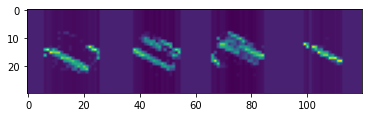

(900, 4) (4, 900)


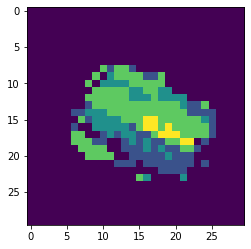

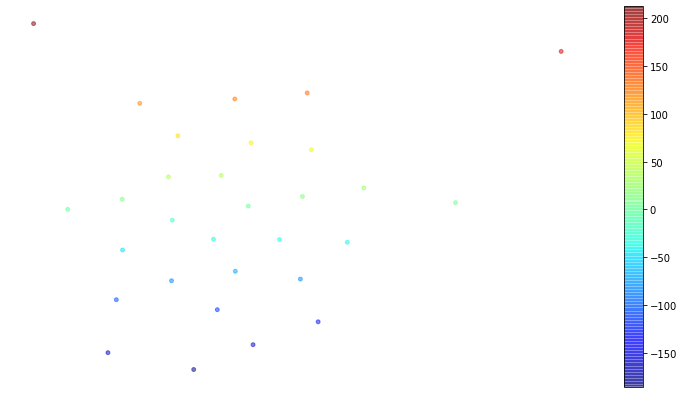

In [18]:
import cv2, os
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import pandas as pd
from sklearn.manifold import TSNE

def tsne_plot(vector2d):
    tsne = TSNE(n_components=2, random_state=41)
    X_reduced = tsne.fit_transform(vector2d)
    plt.figure(figsize=(13, 7))
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1],
                c=X_reduced[:, 1], cmap='jet',
                s=15, alpha=0.5)
    plt.axis('off')
    plt.colorbar()
    plt.show()

def normarize(X, MinMax=True):
    if MinMax:
        Xs = MinMaxScaler().fit_transform(X)
    else:
        sc = StandardScaler()
        Xs = sc.fit_transform(X)
    return Xs

def create_bgr(img):
    r = img * 255 
    g = img * 255 
    b = img * 255
    return np.dstack((r, g, b)).clip(0, 255).astype('uint8')


def set_pixel(ndvi, mode):
    ndvi[mode==-1]=-1
    return ndvi
    
def map2color(mode):
    X = np.zeros(mode.shape, np.uint8)
    print(np.unique(mode))
    X = cv2.cvtColor(X, cv2.COLOR_GRAY2RGB)
    X[mode==-1]=(0, 0, 0) # black
    X[mode==0]=(128, 0, 128) #purple
    X[mode==1]=(0,255, 255) # aqua
    X[mode==2]=(0,255,0) # green
    X[mode==3]=(255,255,0) # red
    plt.imshow(X),plt.show()
    return X

def plot(ndvi):
    fig, ax = plt.subplots()
    aximg = ax.matshow(ndvi)
    cb = fig.colorbar(aximg, ax=ax)
    plt.show()
    
def heatmaps(mode, ndvi):
    concat = np.hstack([mode, ndvi])
    plt.figure()
    print('mode', 'ndvi')
    plt.imshow(concat,interpolation='nearest',vmin=0,vmax=1,cmap='jet')
    plt.colorbar()
    plt.show()

def create_df(mode, ndvi):
    '''1d pandas dataframe'''
    mode, ndvi = np.ravel(mode), np.ravel(ndvi)
    d = {'mode': mode, 'ndvi': ndvi}
    maps = pd.DataFrame(data=d)
    maps.plot()#.get_figure().savefig('df1.png')
    return maps


def correlation_map(df):
    colmuns = ['mode', 'ndvi']
    cr = df[colmuns].corr()
    heatmap = sns.heatmap(cr,cbar=True,annot=True,square=True,fmt='.2f',
                          annot_kws={'size': 15},yticklabels=colmuns,xticklabels=colmuns,cmap='Accent')

def mode_(df, n=10):
    mode = []
    for cn, item in df.iterrows():
        if int(sum(item))==0:
            df["mode"] = -1
            mode.append(-1)
        #print("pd", cn, sum(item))
        else:
            df["mode"] = np.argmax(item)
            mode.append(np.argmax(item))
        #print("np", np.argmax(item))
    return df, np.array(mode).reshape(n, n)

def to1d(obj0, obj1, obj2, obj3):
    objc = np.vstack([obj0.flatten(), obj1.flatten(), obj2.flatten(), obj3.flatten()])
    df = pd.DataFrame(objc.T)
    df.columns = ['obj_0', 'obj_1', 'obj_2', 'obj_3']
    print(df.shape, objc.shape)
    return df

path = '../data/drone'
obj = cv2.imread(os.path.join(path, "samedata_total_count.tif"), -1)
obj0 = cv2.imread(os.path.join(path, "samedata_count_obj0.tif"), -1)
obj1 = cv2.imread(os.path.join(path, "samedata_count_obj1.tif"), -1)
obj2 = cv2.imread(os.path.join(path, "samedata_count_obj2.tif"), -1)
obj3 = cv2.imread(os.path.join(path, "samedata_count_obj3.tif"), -1)

normalize = True
print(obj.shape, obj0.shape, obj1.shape, obj2.shape, obj3.shape)
objc = np.hstack([obj0, obj1, obj2, obj3])
if normalize:
    objc = normarize(objc, MinMax=None)
plt.imshow(objc),plt.show()
df = to1d(obj0, obj1, obj2, obj3)
df, mode = mode_(df, n=30)
plt.imshow(mode),plt.show()
tsne_plot(mode)

(30, 30)


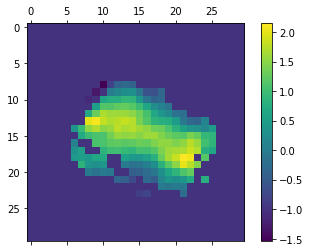

[-1  0  1  2  3]


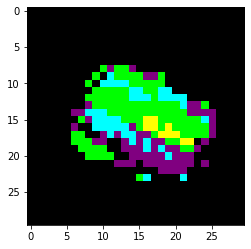

mode ndvi


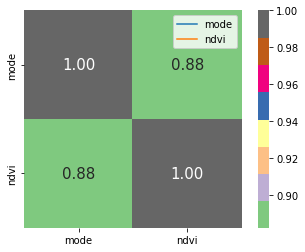

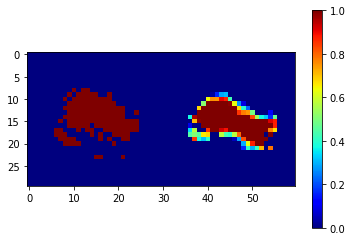

<AxesSubplot:>

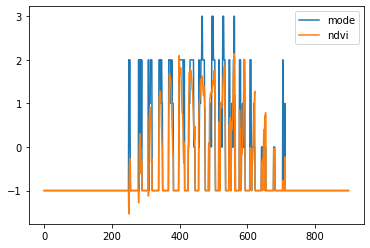

In [19]:
ndvi = cv2.imread("../data/samedata_ndvi.tif", -1)
if normalize:
    ndvi = normarize(ndvi, MinMax=None)
ndvi = set_pixel(ndvi, mode)
print(ndvi.shape)
plot(ndvi)
map2color(mode)
maps = create_df(mode, ndvi)
correlation_map(maps)
heatmaps(mode, ndvi)
maps.plot()